In [2]:
from meu_regressor_linear import multiple_gradient_descent_wrapper, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
base = pd.read_csv('house_prices.csv')

In [4]:
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#Retira de base o atributo id, o atributo date, e os atributos sqft_living15 e sqft_lot15
base = base.drop(['id', 'date', 'sqft_living15', 'sqft_lot15'], axis = 1)

In [6]:
base.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


OBS: também poderia fazer:

base = pd.read_csv('houses_prices.csv, usecols = colunas_desejadas)

Aonde colunas_desejadas é uma lista com o nome das colunas que eu quero usar.

In [7]:
#Faz uma matriz com apenas os precos das casas
#A sintaxe é a seguinte:
#base.iloc[:, 0:1] --> pega todas as linhas e as colunas que estão entre [0, 1) (ou seja, pega a coluna 0) o upper bound é exclusivo.
#iloc significa index location
precos = np.array(base.iloc[:, 0:1], dtype = np.float64)


In [8]:
precos

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [9]:
#retira o preço da base da base de dados para fazer todas as colunas serem apenas variaveis independentes.
base = base.drop('price', axis = 1)

In [10]:
base.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [11]:
#faz uma matriz com todos as variaveis independentes
atributos = np.array(base, dtype = float)

In [12]:
atributos[0]

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  9.81780e+04,  4.75112e+01, -1.22257e+02])

In [13]:
#separa a base de dados em treino e teste com 70% dos dados para treino e 30% para teste.

tam = len(precos)
tam_treino = int(tam * 0.7)
tam_teste = tam - tam_treino

precos_treino = precos[0:tam_treino]
precos_teste = precos[tam_treino:tam +1]

atributos_treino = atributos[0:tam_treino]
atributos_teste = atributos[tam_treino:tam +1]

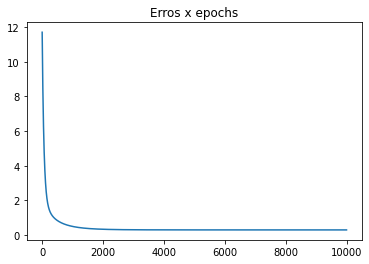

In [14]:
epochs = 10000
learning_rate = 0.001
coeficients, errors, previsions_treino, scaler_y = multiple_gradient_descent_wrapper(atributos_treino, precos_treino, epochs, learning_rate)

In [15]:
coeficients

array([[-9.26950605e-02],
       [ 7.97743215e-02],
       [-3.40592669e-01],
       [-5.38287813e-03],
       [-6.18507066e-03],
       [ 1.47881456e-01],
       [ 1.10274289e-01],
       [ 4.61887723e-02],
       [ 3.02407295e-01],
       [ 7.48903630e-01],
       [ 3.62958361e-01],
       [-2.23249509e-01],
       [ 2.17681136e-02],
       [-8.92142693e-02],
       [ 2.24000930e-01],
       [-6.85209095e-02],
       [ 1.19255153e-09]])

In [16]:
coeficients.shape

(17, 1)

In [17]:
atributos_teste.shape

(6484, 16)

In [18]:
#adiciona uma coluna de 1s para o coeficiente linear b em atributos_teste
atributos_teste = np.c_[atributos_teste, np.ones(atributos_teste.shape[0])]

In [19]:
atributos_teste.shape

(6484, 17)

Agora já se pode fazer o produto de matrizes entre atributos_teste e coeficientes, pois atributos_teste é uma matriz 6484 x 17, e coeficientes é uma matriz 17 x 1.

In [20]:
#Faz as previsoes para a base de teste usano o produto de matrizes entre os atributos de teste e os coeficientes encontrados fazendo a1*x1 + a2*x2 + ... + an*xn + b
previsions_teste = np.dot(atributos_teste, coeficients)

#Desescala as previsoes
previsions_teste = scaler_y.inverse_transform(previsions_teste)

In [21]:
previsions_teste[0:20]

array([[-3.09984060e+09],
       [-2.90594793e+09],
       [-3.24049933e+09],
       [-3.06599347e+09],
       [-3.25180385e+09],
       [-3.08701397e+09],
       [-2.99743696e+09],
       [-3.18749711e+09],
       [-3.22202034e+09],
       [-3.08246752e+09],
       [-3.24078503e+09],
       [-3.18963416e+09],
       [-3.02586280e+09],
       [-3.05928583e+09],
       [-3.10288364e+09],
       [-3.21657157e+09],
       [-3.17242198e+09],
       [-3.14736109e+09],
       [-3.14736109e+09],
       [-3.21065024e+09]])

In [22]:
precos_teste[0:20]

array([[ 937750.],
       [ 725126.],
       [ 135000.],
       [ 635000.],
       [ 245500.],
       [ 230000.],
       [1770000.],
       [ 425000.],
       [ 220000.],
       [ 370000.],
       [ 390000.],
       [ 239000.],
       [ 345000.],
       [ 289000.],
       [ 285000.],
       [ 147400.],
       [ 600000.],
       [ 245000.],
       [ 520000.],
       [ 352500.]])

In [23]:
mae_treino = mean_absolute_error(precos_treino, previsions_treino)
mae_teste = mean_absolute_error(precos_teste, previsions_teste)

In [24]:
mae_treino

124831.93058745895

In [25]:
mae_teste

3101772136.114615